In [1]:
from coba.benchmarks import Result

full_1 = Result.from_file("./outcomes/full_1.log").filter_lrn(family="^.*(Mem|vw|cor|Res)").filter_sim(source="^(?:(?!1531|1532|1533|1536|1537|42857).)*$").filter_fin()
full_2 = Result.from_file("./outcomes/full_2.log").filter_sim(simulation_id = lambda s: s < 136).filter_fin()

In [103]:
import pandas as pd
pd.set_option('display.max_rows', 250)

In [2]:
full_2

{'Learners': 3, 'Simulations': 52, 'Interactions': 1560000}

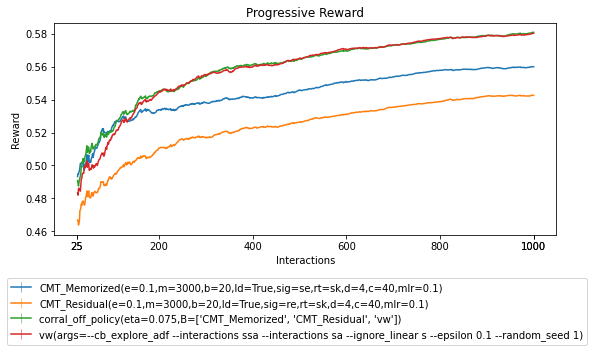

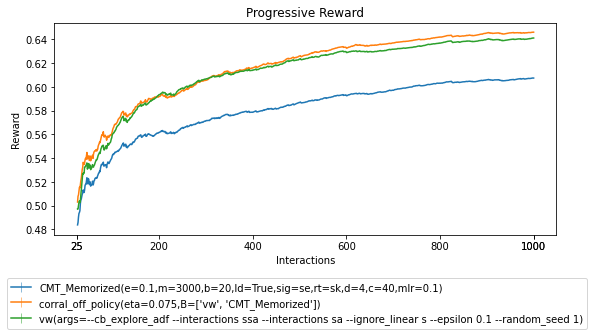

In [3]:
full_1.plot_learners(xlim=(25,1000))
full_2.plot_learners(xlim=(25,1000))

10000


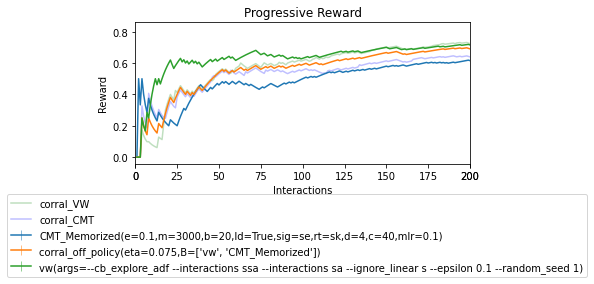

index  reward_x  reward_y  predict  predict_0  predict_1  pbar_0
0        1         0         0   0.7250       0.50       0.95  0.5000
1        2         0         0   0.2776       0.50       0.05  0.5058
2        3         0         0   0.7292       0.50       0.95  0.4906
3        4         1         1   0.7266       0.50       0.95  0.4964
4        5         0         0   0.9500       0.95       0.95  0.4964
..     ...       ...       ...      ...        ...        ...     ...
245    246         1         1   0.6387       0.95       0.05  0.6541
246    247         1         1   0.9500       0.95       0.95  0.6541
247    248         1         1   0.9500       0.95       0.95  0.6541
248    249         1         1   0.3613       0.05       0.95  0.6541
249    250         1         1   0.9500       0.95       0.95  0.6541

[250 rows x 7 columns]

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

minx=0#2623
maxx=200#10000

source = 41150

interactions = full_2.filter_sim(source=source).filter_lrn(learner_id=2).interactions.to_pandas()

interactions["reward_0"] = interactions["reward"]*interactions["predict_0"]/interactions["predict"]
interactions["reward_1"] = interactions["reward"]*interactions["predict_1"]/interactions["predict"]

print(len(interactions))

fig,ax = plt.subplots()

plt.plot(interactions["index"][minx:], interactions["reward_0"].expanding(0).mean()[minx:], label="corral_VW", c="green",alpha=0.25)
plt.plot(interactions["index"][minx:], interactions["reward_1"].expanding(0).mean()[minx:], label="corral_CMT",c="blue", alpha=0.25)

#plt.plot(interactions["index"][minx:maxx], interactions["predict_0"][minx:maxx], color="y", alpha=0.25)
#plt.plot(interactions["index"][minx:maxx], interactions["predict"][minx:maxx], color="y", alpha=0.25)

full_2.filter_sim(source=source).plot_learners(xlim=(minx,maxx),show=False,ax=ax,fig=fig)

ax.set_xlim(minx,maxx)
plt.show()

corral = full_2.filter_sim(source=source).filter_lrn(family="corral").interactions.to_pandas()
vw     = full_2.filter_sim(source=source).filter_lrn(family="vw").interactions.to_pandas()[["index","reward"]]

pd.merge(corral, vw, on="index")[["index", "reward_x", "reward_y", "predict", "predict_0", "predict_1", "pbar_0"]][minx:(minx+250)]

#interactions
#0 = VW
#1 = CMT


0,{"OpenmlSimulation":1481}


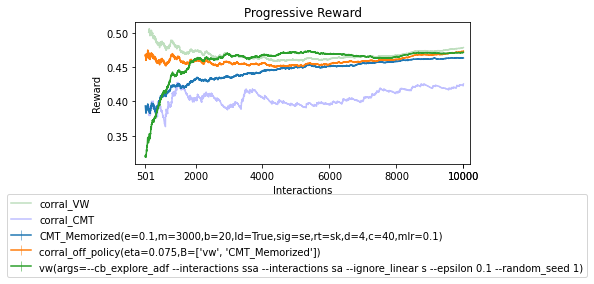

1,{"OpenmlSimulation":1483}


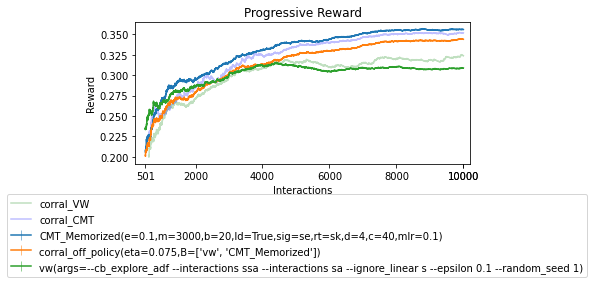

2,{"OpenmlSimulation":1471}


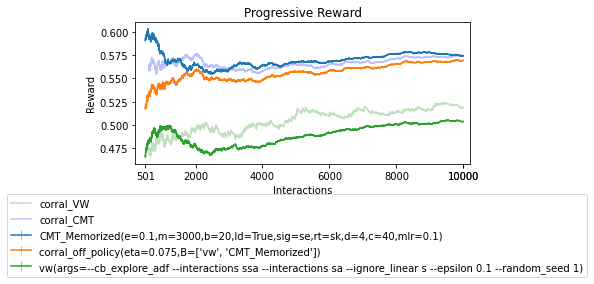

3,{"OpenmlSimulation":1461}


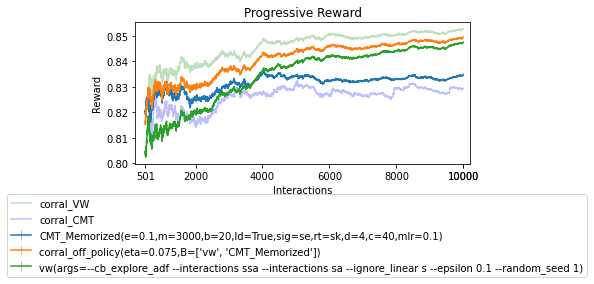

4,{"OpenmlSimulation":1509}


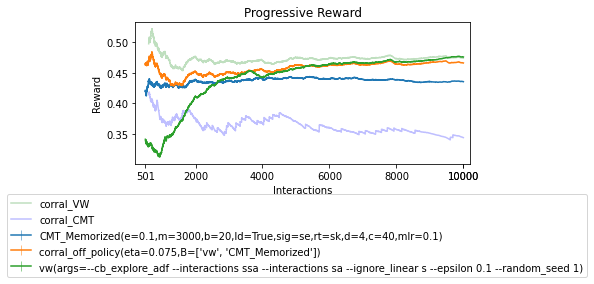

5,{"OpenmlSimulation":1534}


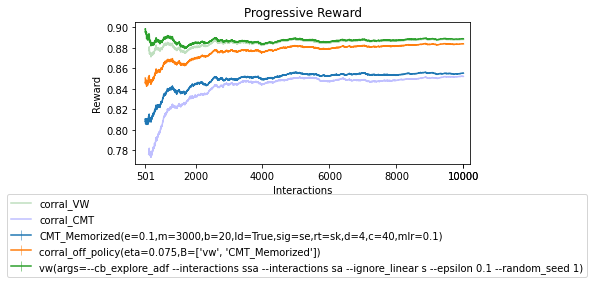

6,{"OpenmlSimulation":4135}


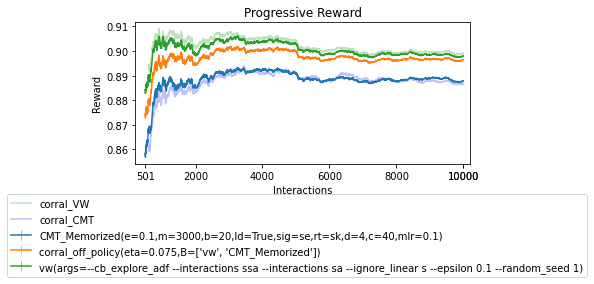

7,{"OpenmlSimulation":23512}


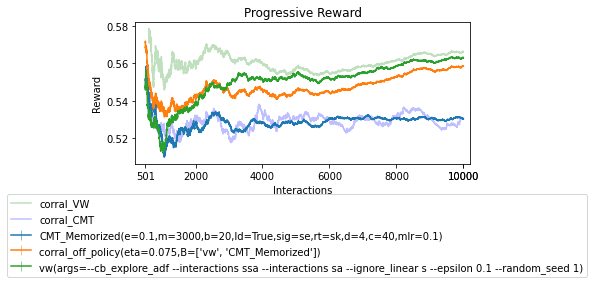

9,{"OpenmlSimulation":23517}


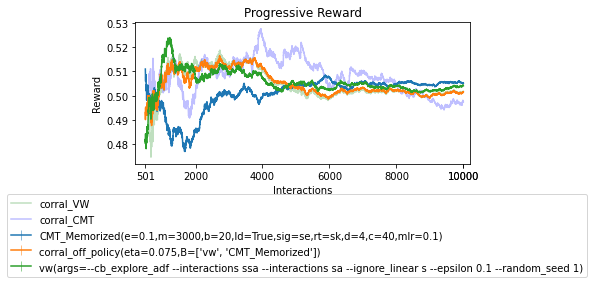

10,{"OpenmlSimulation":1459}


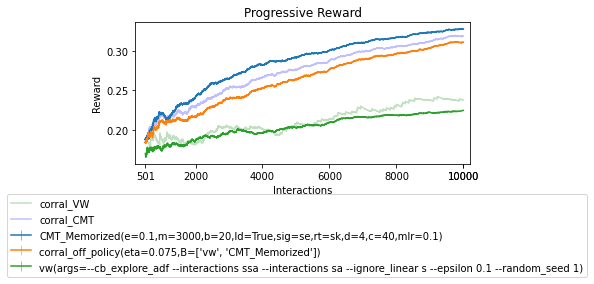

13,{"OpenmlSimulation":23395}


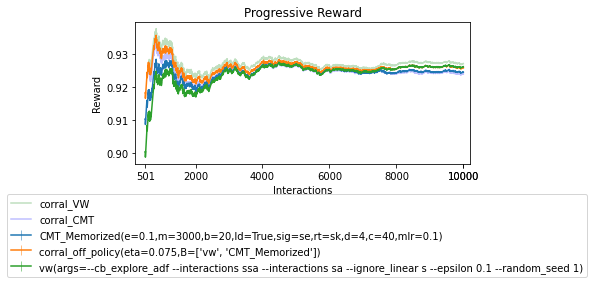

15,{"OpenmlSimulation":4154}


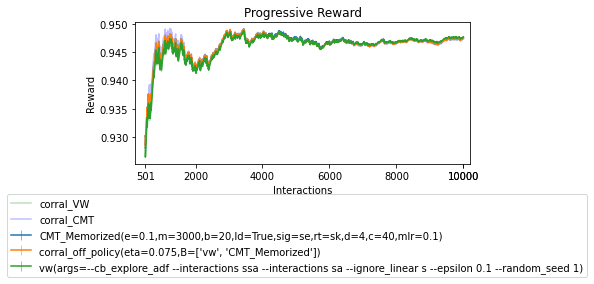

19,{"OpenmlSimulation":4534}


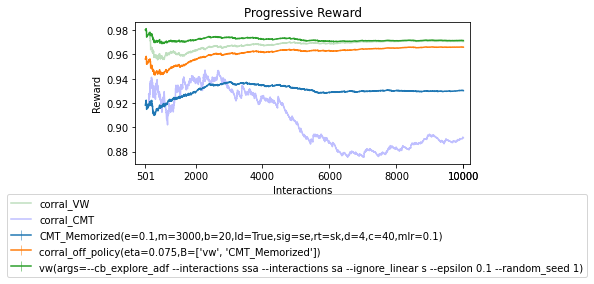

22,{"OpenmlSimulation":1217}


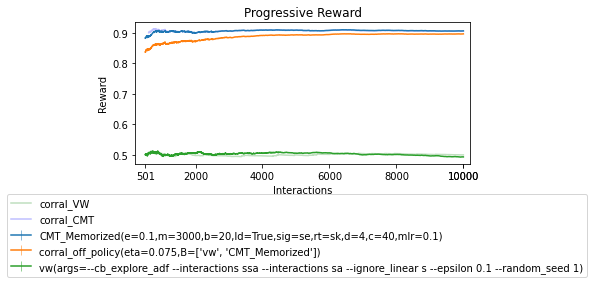

25,{"OpenmlSimulation":1222}


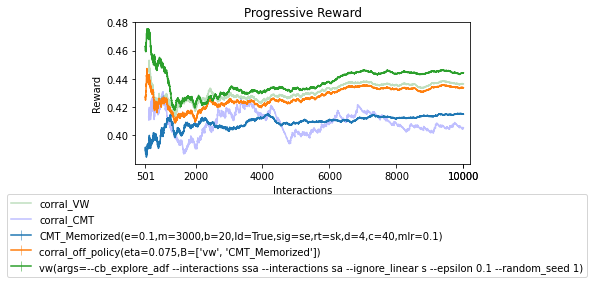

30,{"OpenmlSimulation":1575}


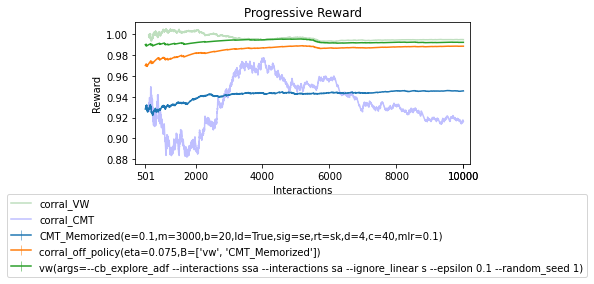

31,{"OpenmlSimulation":1568}


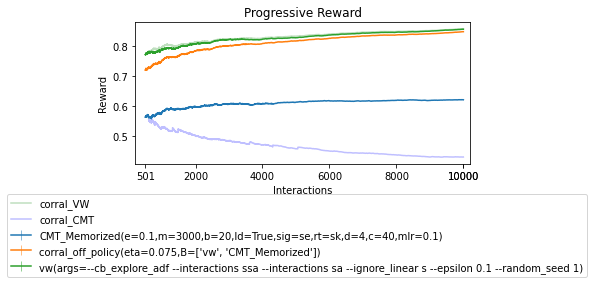

36,{"OpenmlSimulation":143}


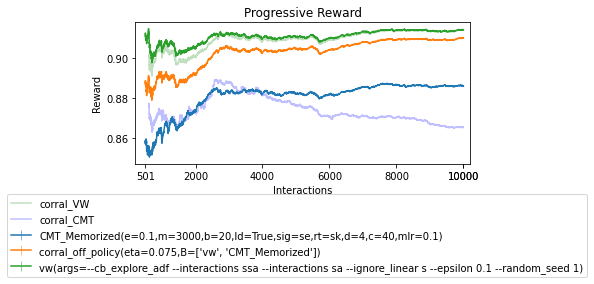

37,{"OpenmlSimulation":265}


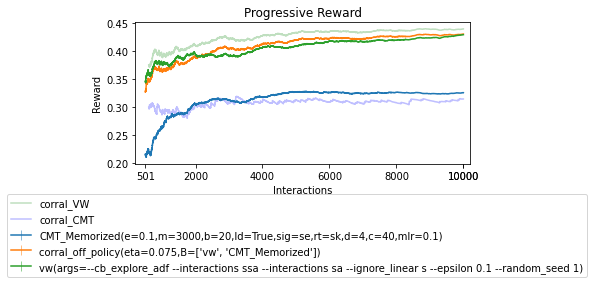

38,{"OpenmlSimulation":133}


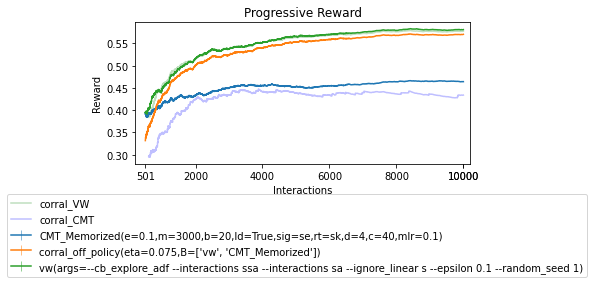

40,{"OpenmlSimulation":180}


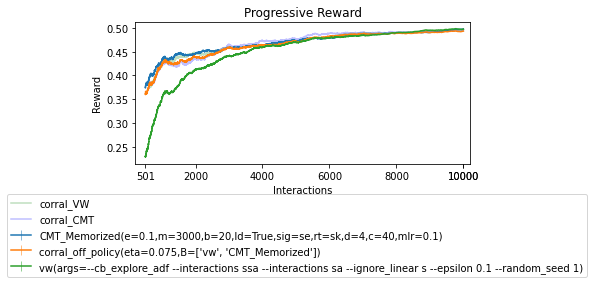

48,{"OpenmlSimulation":42680}


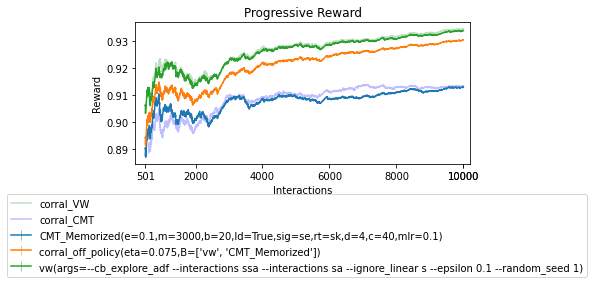

52,{"OpenmlSimulation":42856}


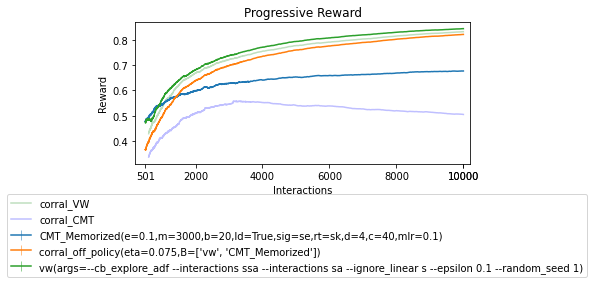

53,{"OpenmlSimulation":42845}


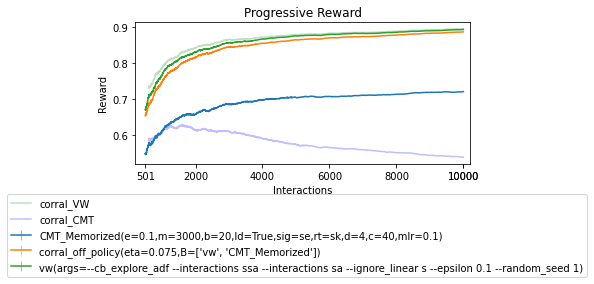

54,{"OpenmlSimulation":42846}


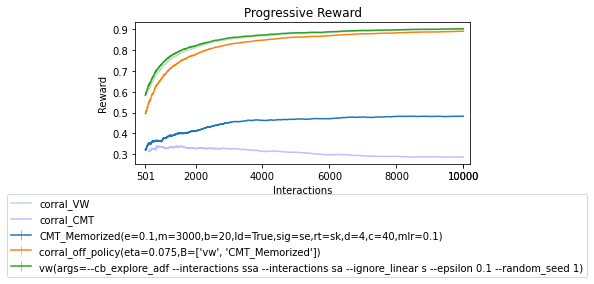

55,{"OpenmlSimulation":42813}


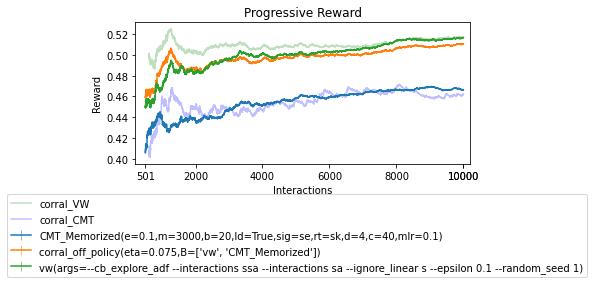

68,{"OpenmlSimulation":42750}


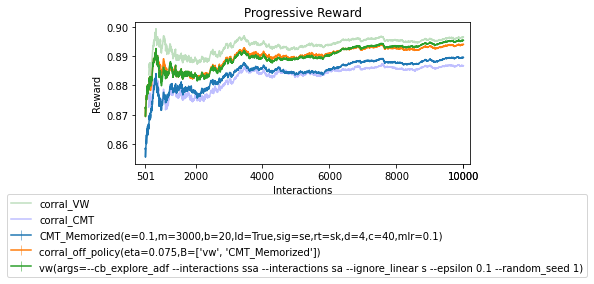

72,{"OpenmlSimulation":42839}


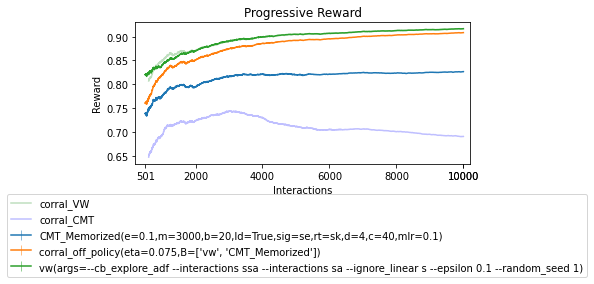

75,{"OpenmlSimulation":40668}


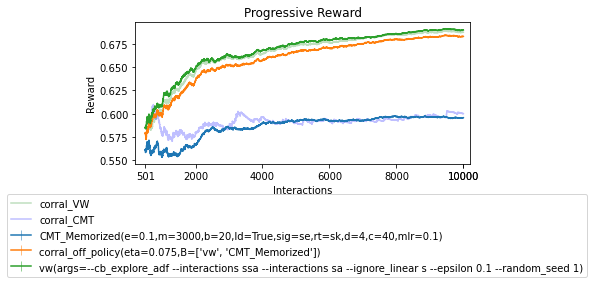

77,{"OpenmlSimulation":41723}


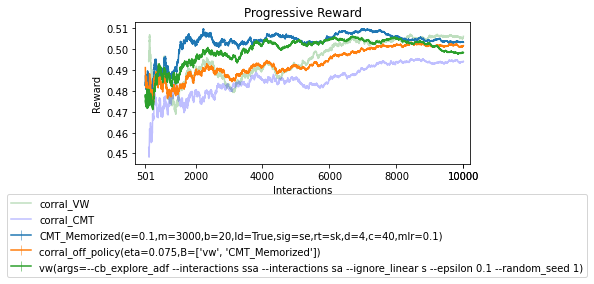

78,{"OpenmlSimulation":41727}


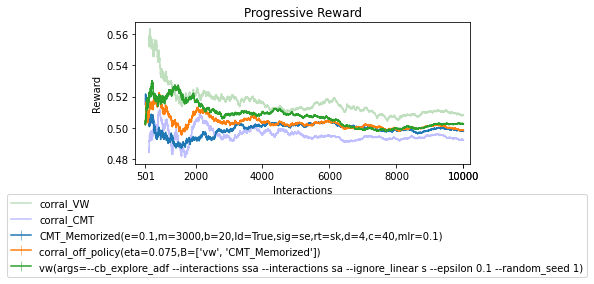

79,{"OpenmlSimulation":41715}


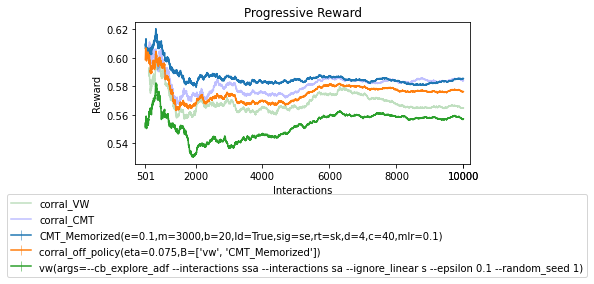

80,{"OpenmlSimulation":41718}


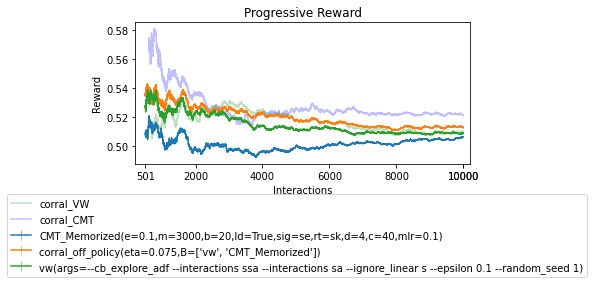

81,{"OpenmlSimulation":41709}


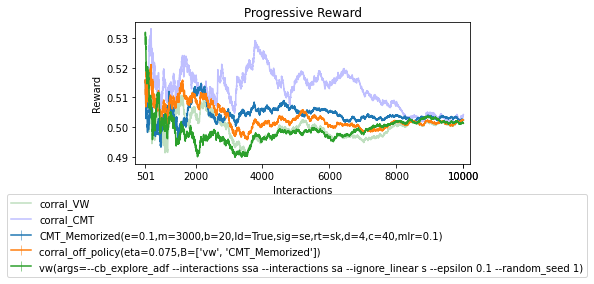

82,{"OpenmlSimulation":41712}


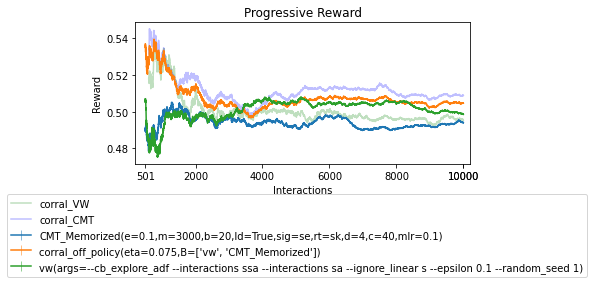

83,{"OpenmlSimulation":40672}


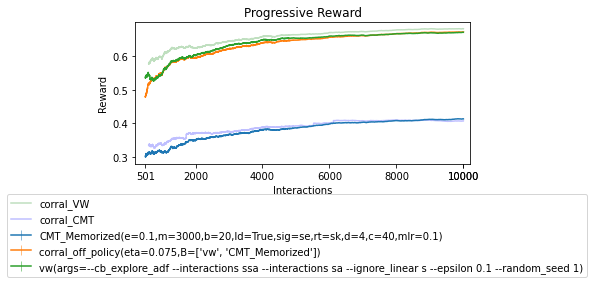

84,{"OpenmlSimulation":40685}


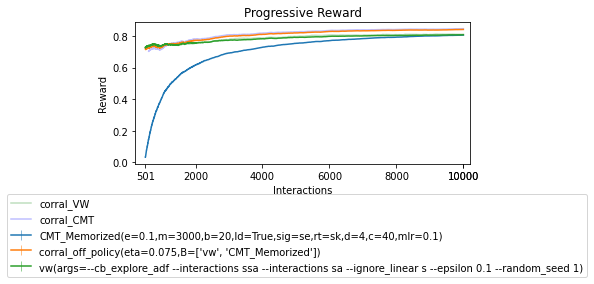

85,{"OpenmlSimulation":41027}


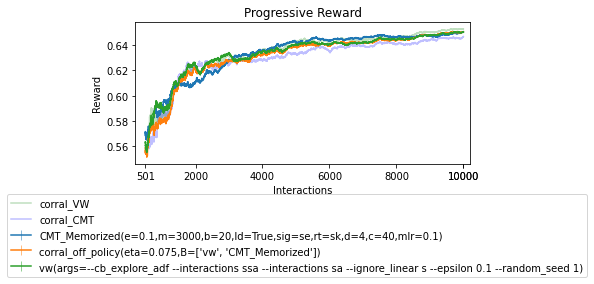

87,{"OpenmlSimulation":40985}


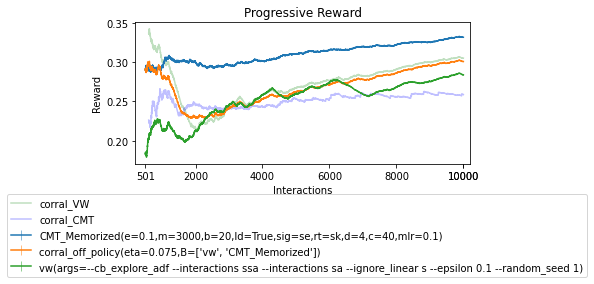

91,{"OpenmlSimulation":42493}


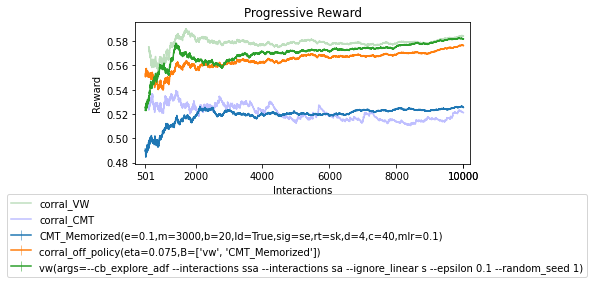

94,{"OpenmlSimulation":42477}


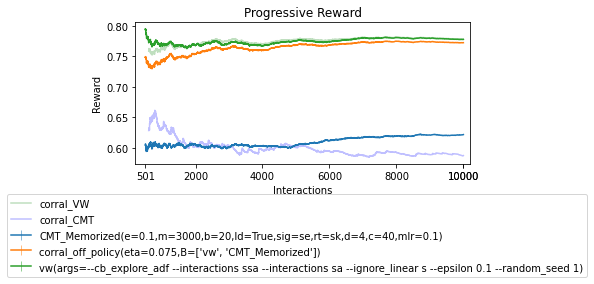

98,{"OpenmlSimulation":40922}


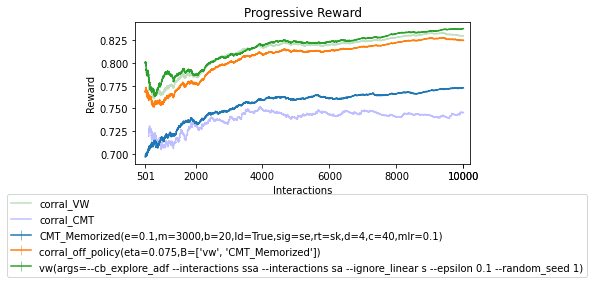

99,{"OpenmlSimulation":41162}


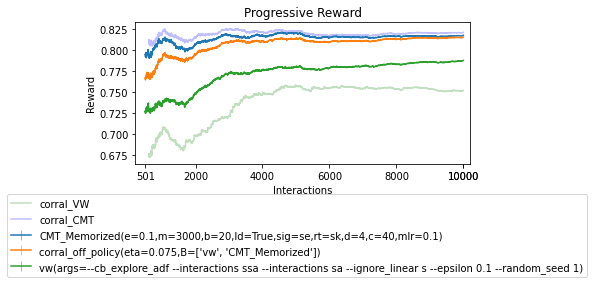

100,{"OpenmlSimulation":41168}


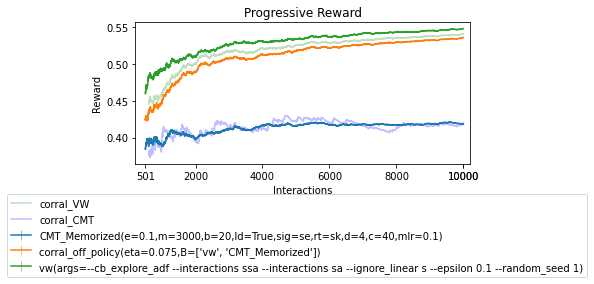

106,{"OpenmlSimulation":41150}


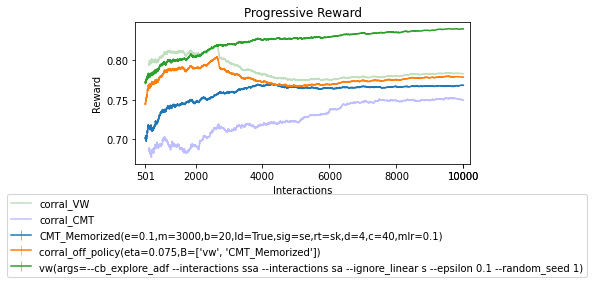

107,{"OpenmlSimulation":41160}


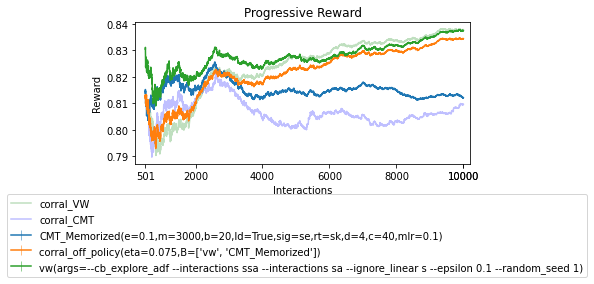

115,{"OpenmlSimulation":41440}


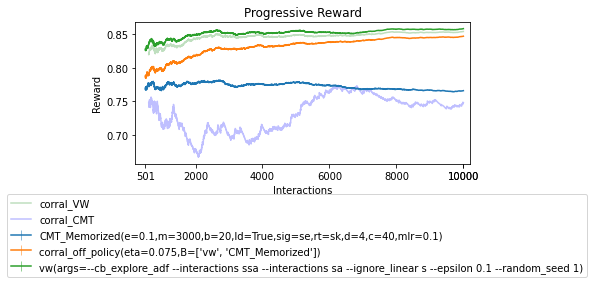

116,{"OpenmlSimulation":42345}


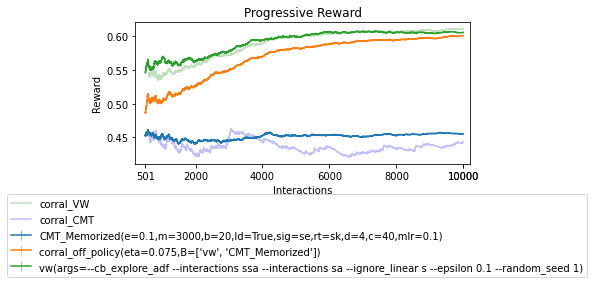

122,{"OpenmlSimulation":41526}


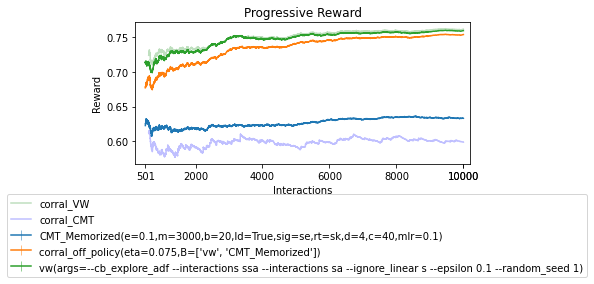

128,{"OpenmlSimulation":42252}


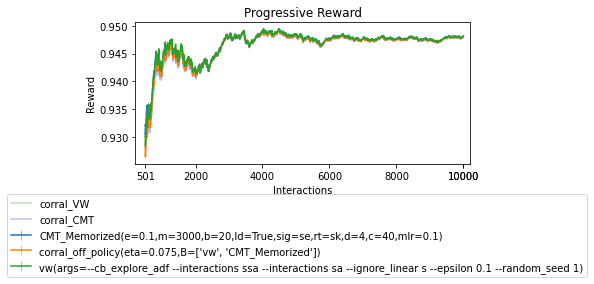

129,{"OpenmlSimulation":42256}


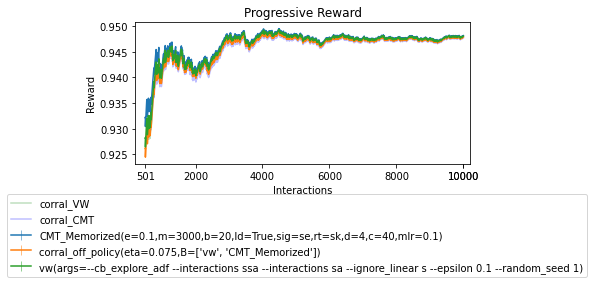

132,{"OpenmlSimulation":41671}


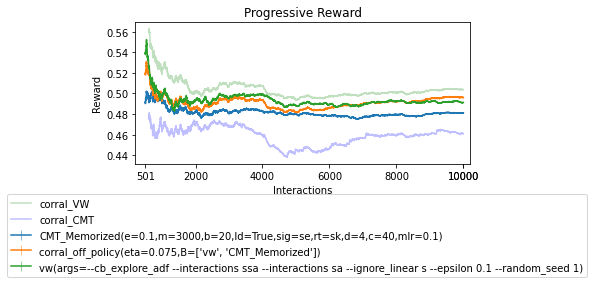

In [77]:

for s in full_2.simulations:
    print(f"{s['simulation_id']},{s['source']}")
    
    interactions = full_2.filter_sim(source=s['source']).filter_lrn(learner_id=2).interactions.to_pandas()
    interactions["reward_0"] = interactions["reward"]*interactions["predict_0"]/interactions["predict"]
    interactions["reward_1"] = interactions["reward"]*interactions["predict_1"]/interactions["predict"]

    fig,ax = plt.subplots()

    plt.plot(interactions["index"][minx:], interactions["reward_0"].expanding(0).mean()[minx:], label="corral_VW", c="green",alpha=0.25)
    plt.plot(interactions["index"][minx:], interactions["reward_1"].expanding(0).mean()[minx:], label="corral_CMT",c="blue", alpha=0.25)

    full_2.filter_sim(source=s['source']).plot_learners(span=None,show=False,ax=ax,fig=fig)

    ax.set_xlim(200,10200)
    plt.show()

0,{"OpenmlSimulation":1481}


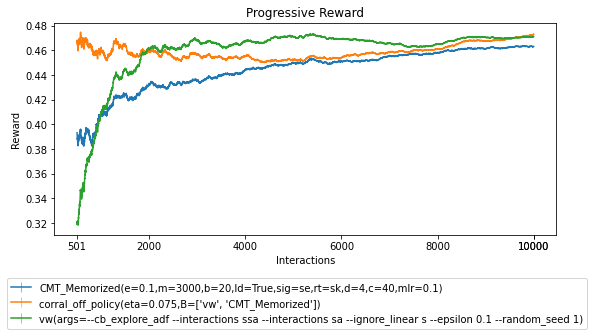

1,{"OpenmlSimulation":1483}


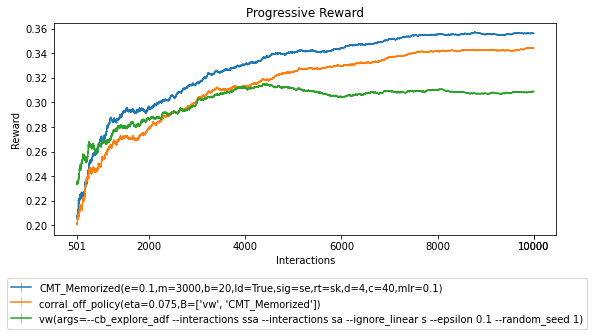

2,{"OpenmlSimulation":1471}


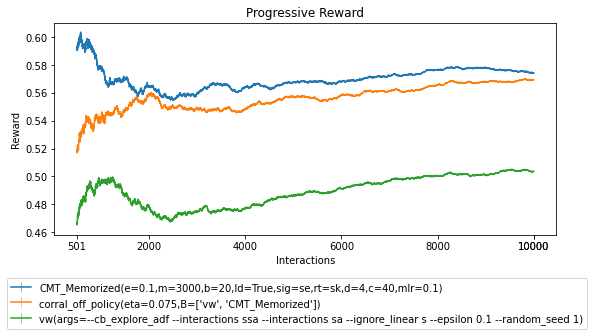

3,{"OpenmlSimulation":1461}


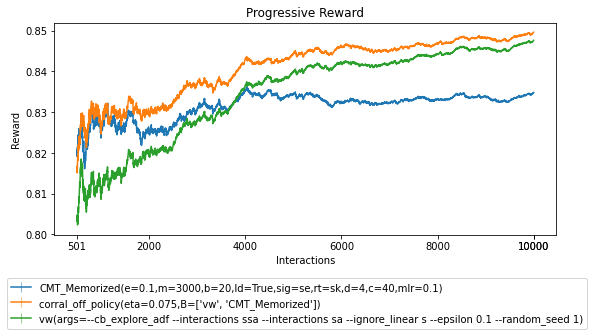

4,{"OpenmlSimulation":1509}


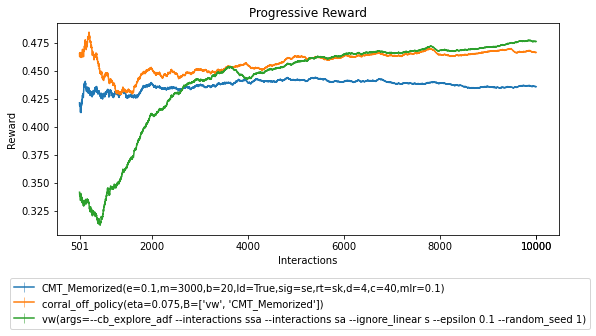

5,{"OpenmlSimulation":1534}


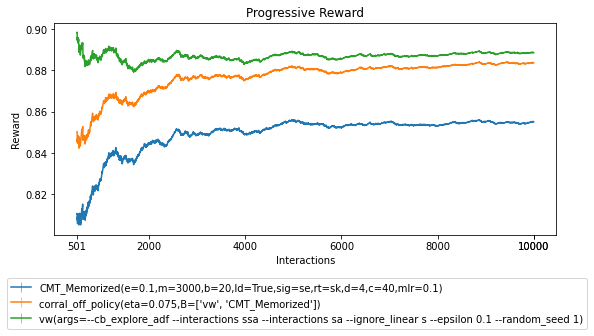

6,{"OpenmlSimulation":4135}


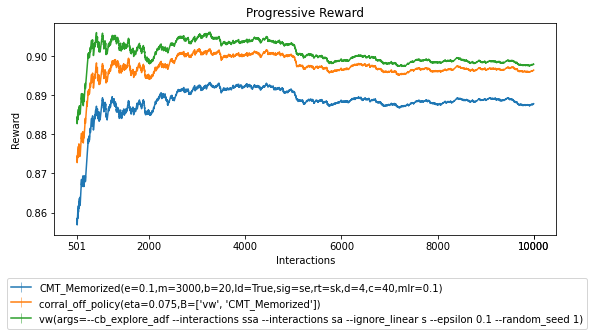

7,{"OpenmlSimulation":23512}


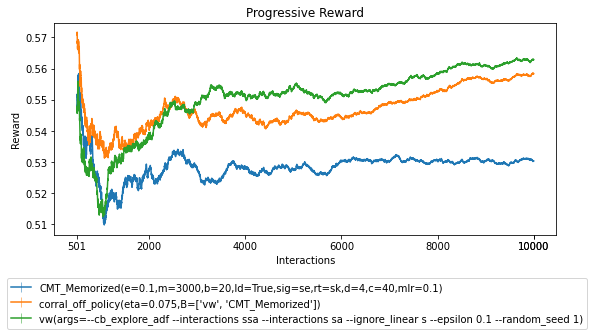

9,{"OpenmlSimulation":23517}


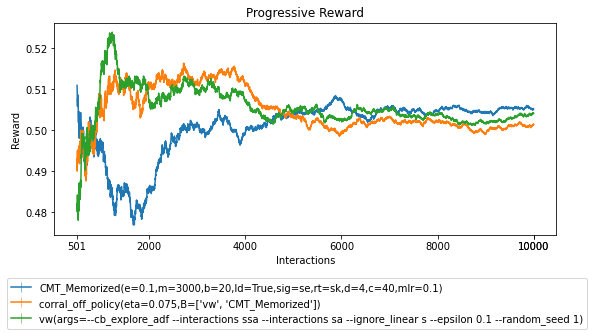

10,{"OpenmlSimulation":1459}


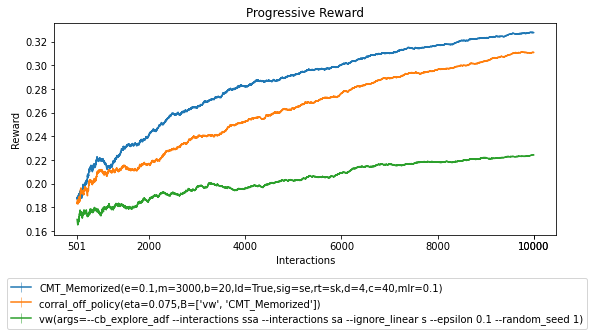

13,{"OpenmlSimulation":23395}


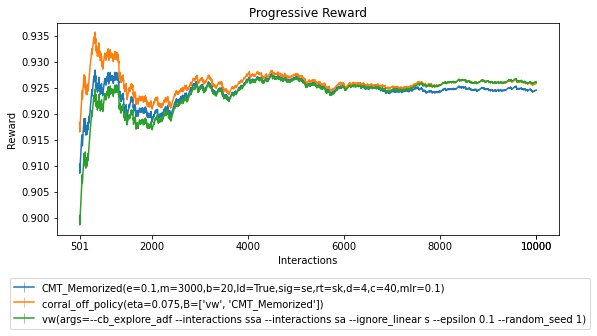

15,{"OpenmlSimulation":4154}


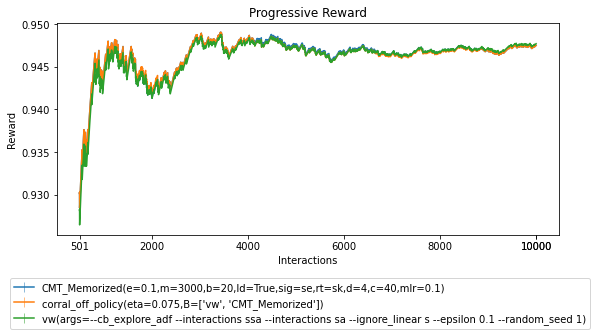

19,{"OpenmlSimulation":4534}


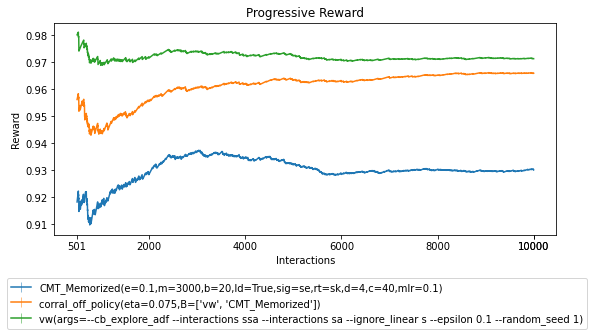

22,{"OpenmlSimulation":1217}


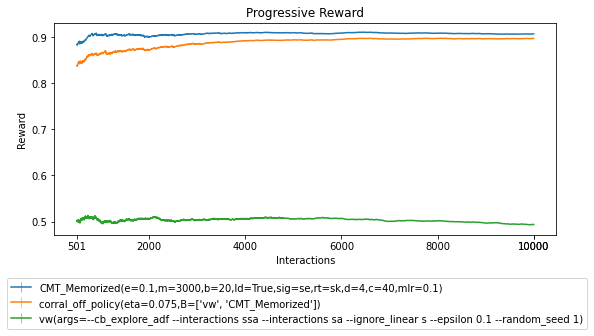

25,{"OpenmlSimulation":1222}


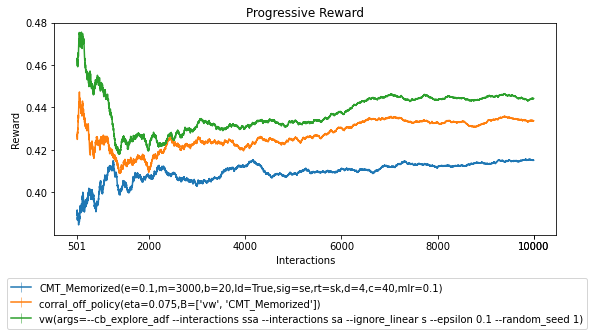

30,{"OpenmlSimulation":1575}


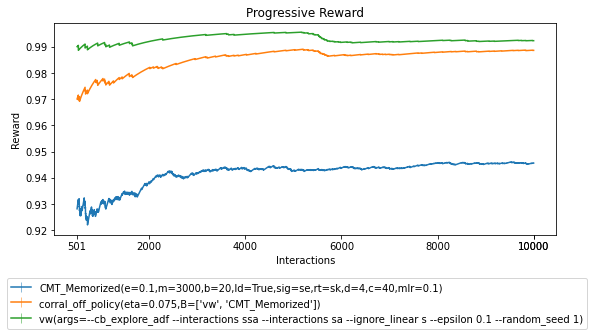

31,{"OpenmlSimulation":1568}


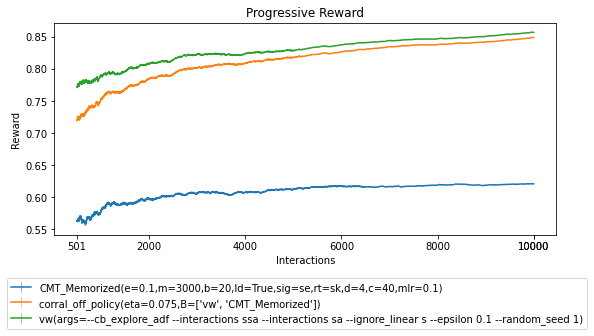

36,{"OpenmlSimulation":143}


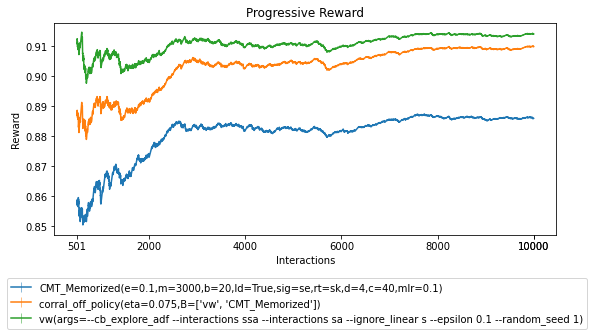

37,{"OpenmlSimulation":265}


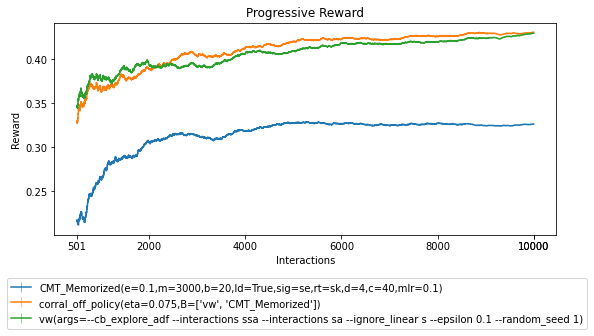

38,{"OpenmlSimulation":133}


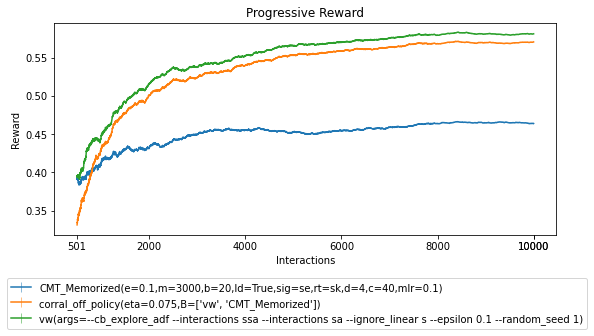

40,{"OpenmlSimulation":180}


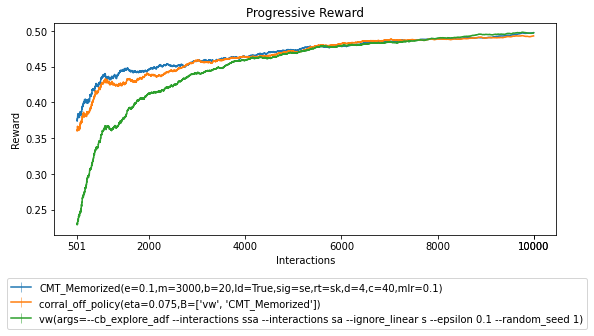

48,{"OpenmlSimulation":42680}


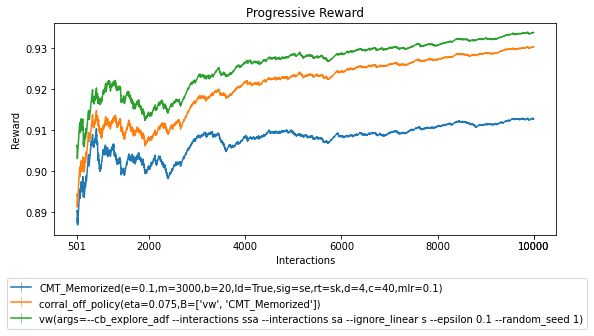

52,{"OpenmlSimulation":42856}


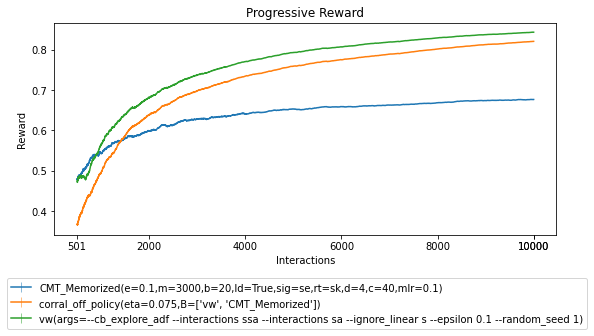

53,{"OpenmlSimulation":42845}


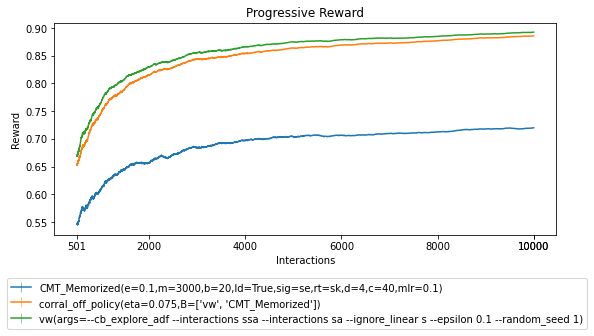

54,{"OpenmlSimulation":42846}


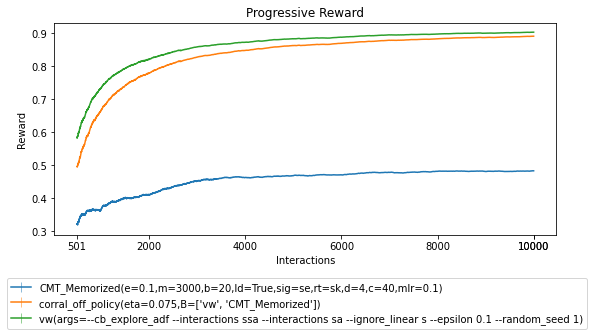

55,{"OpenmlSimulation":42813}


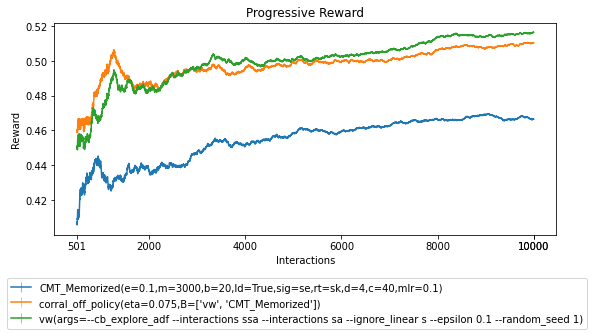

68,{"OpenmlSimulation":42750}


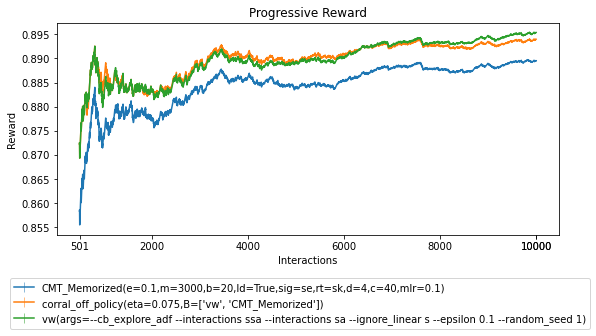

72,{"OpenmlSimulation":42839}


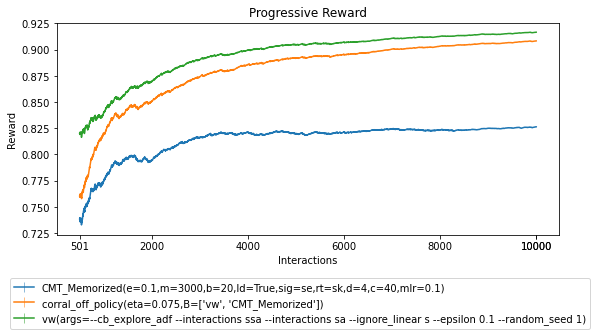

75,{"OpenmlSimulation":40668}


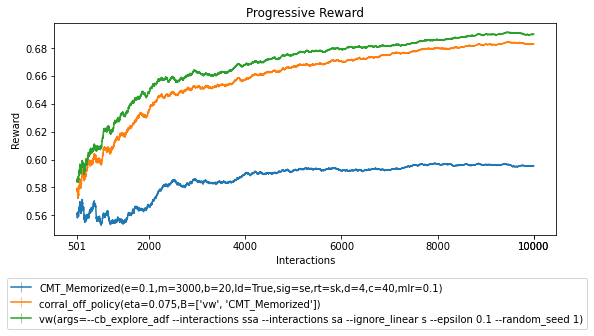

77,{"OpenmlSimulation":41723}


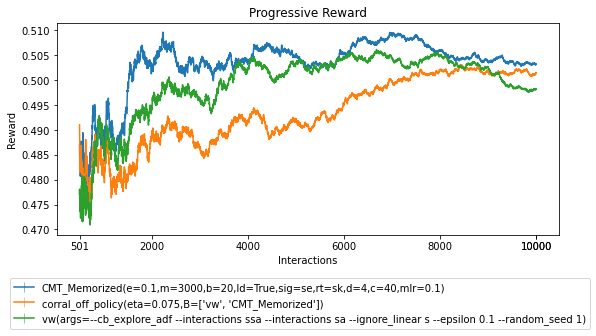

78,{"OpenmlSimulation":41727}


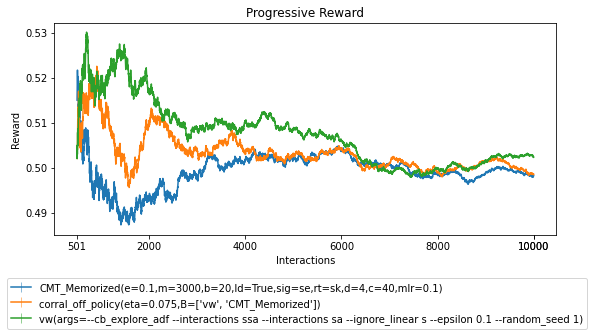

79,{"OpenmlSimulation":41715}


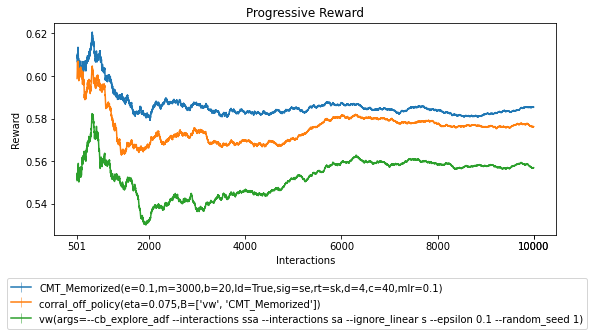

80,{"OpenmlSimulation":41718}


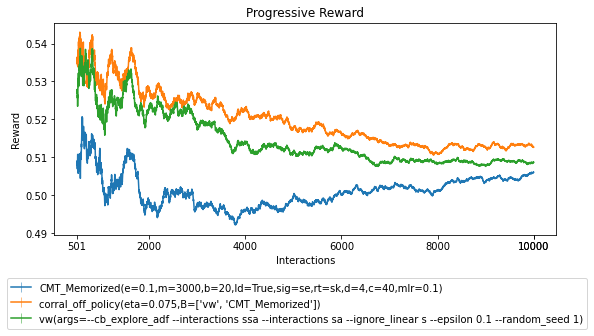

81,{"OpenmlSimulation":41709}


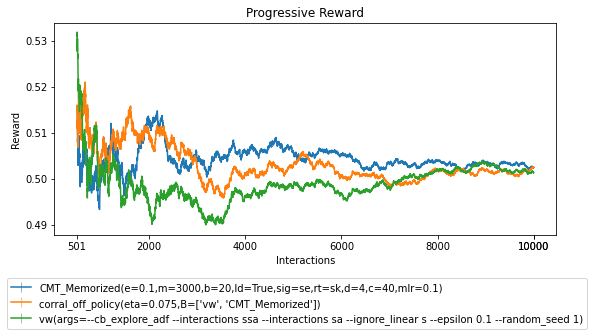

82,{"OpenmlSimulation":41712}


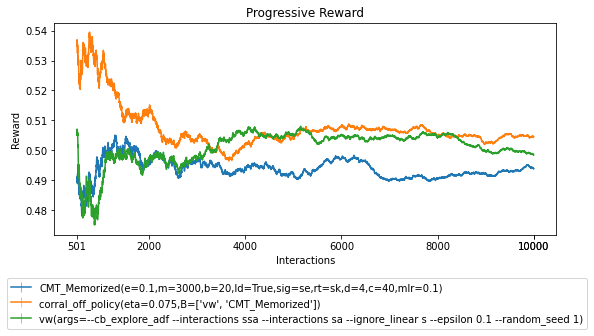

83,{"OpenmlSimulation":40672}


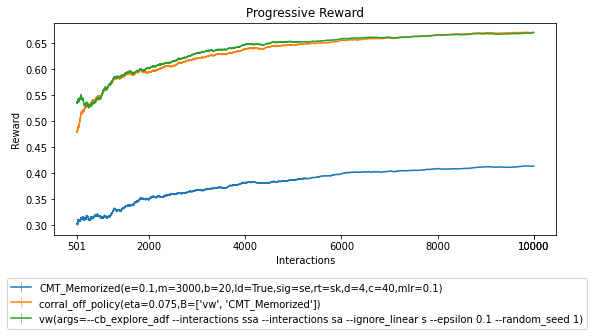

84,{"OpenmlSimulation":40685}


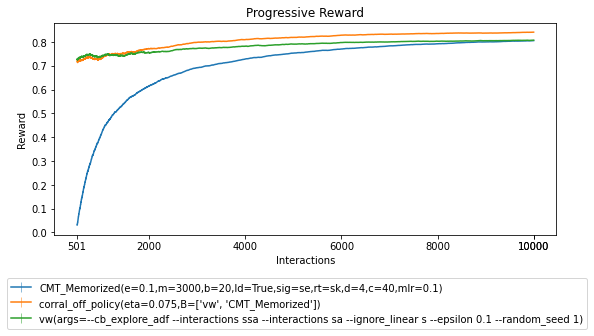

85,{"OpenmlSimulation":41027}


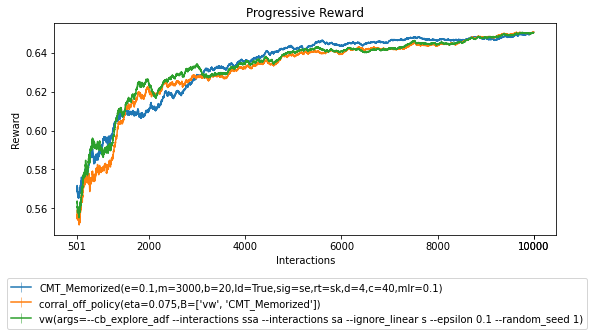

87,{"OpenmlSimulation":40985}


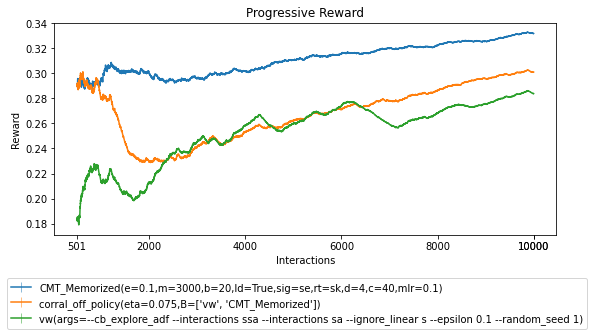

91,{"OpenmlSimulation":42493}


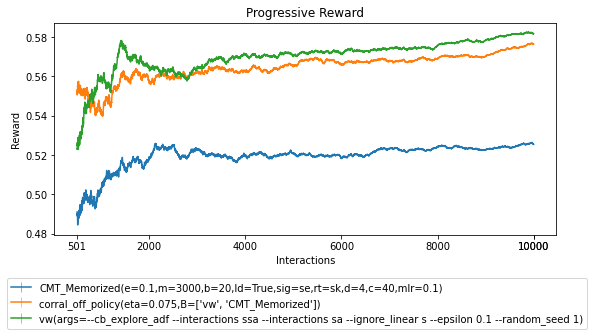

94,{"OpenmlSimulation":42477}


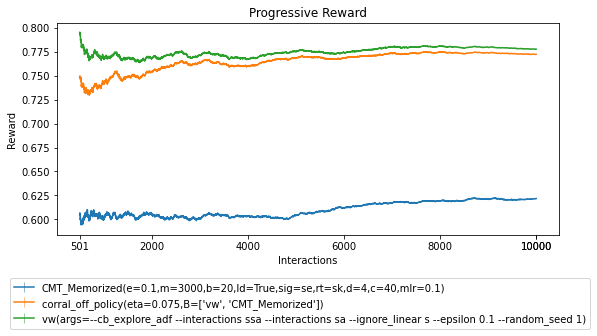

98,{"OpenmlSimulation":40922}


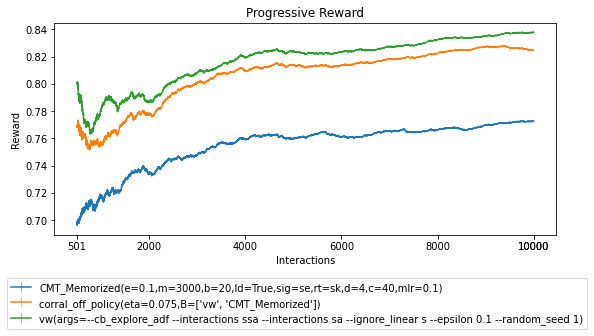

99,{"OpenmlSimulation":41162}


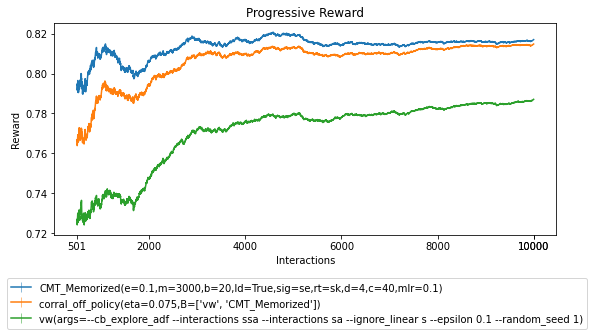

100,{"OpenmlSimulation":41168}


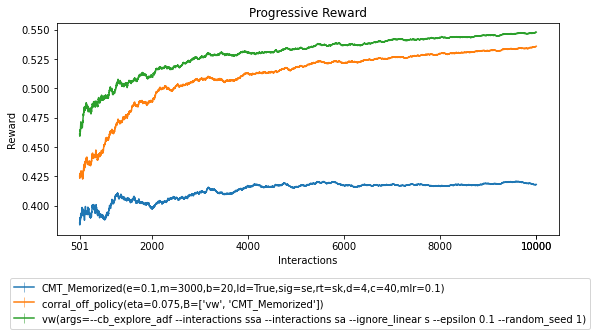

106,{"OpenmlSimulation":41150}


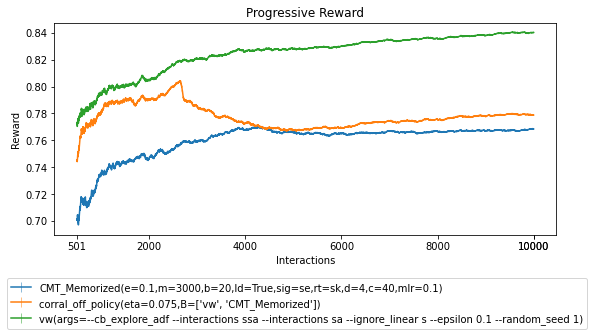

107,{"OpenmlSimulation":41160}


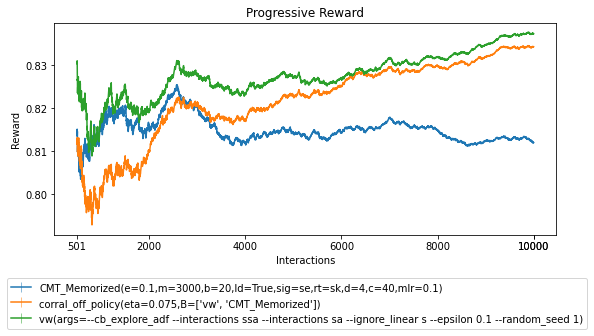

115,{"OpenmlSimulation":41440}


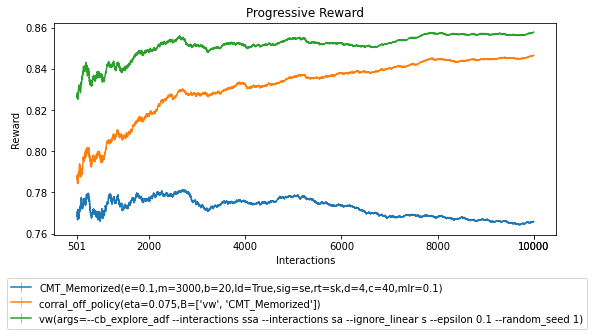

116,{"OpenmlSimulation":42345}


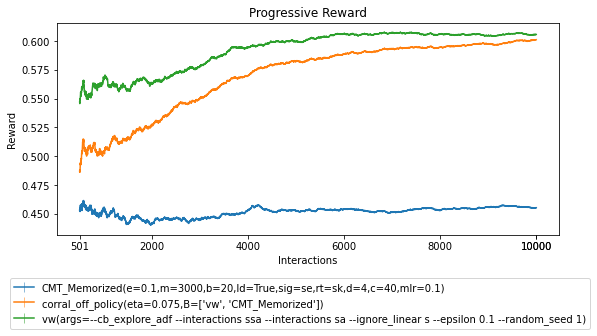

122,{"OpenmlSimulation":41526}


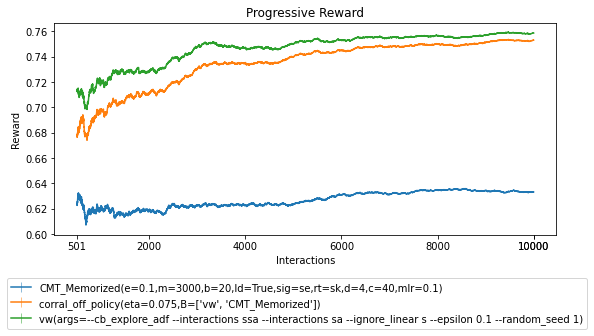

128,{"OpenmlSimulation":42252}


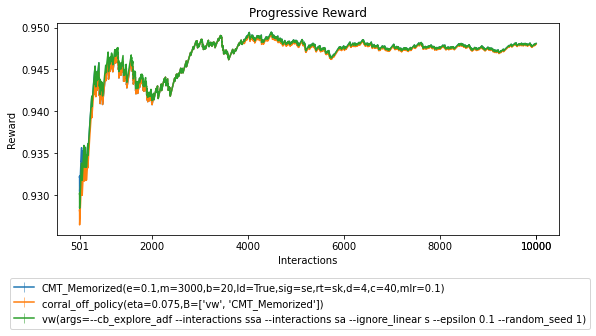

129,{"OpenmlSimulation":42256}


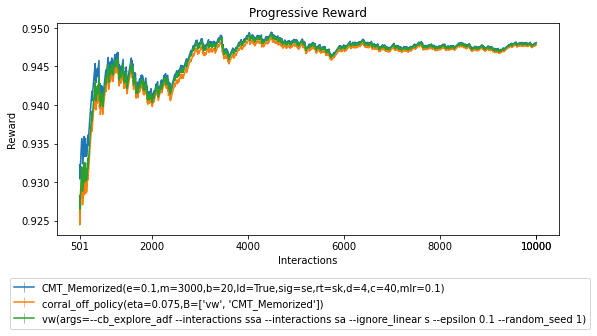

132,{"OpenmlSimulation":41671}


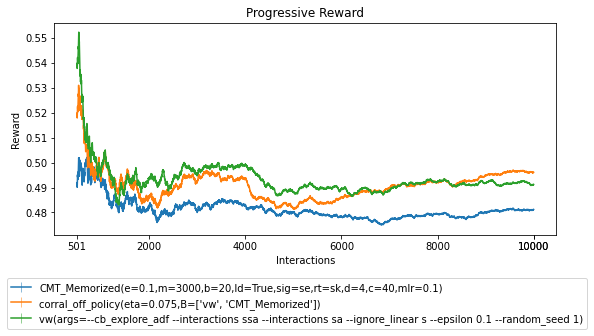

In [3]:
for s in full_2.simulations:
    print(f"{s['simulation_id']},{s['source']}")
    full_2.filter_sim(source=s['source']).plot_learners(span=None)